In [1]:
import pandas as pd #importamos pandas como pd alias
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.impute import KNNImputer

In [2]:
# lectura de datos en Python
df_FeatDataSet= pd.read_csv('./Features data set.csv')
df_SalesData = pd.read_csv('./sales data-set.csv')
df_Tabla = pd.read_csv('./Tabla_1.csv')

In [3]:
df_FeatDataSet.shape #REVISAREMOS FILAS Y COLUMNAS DE PRIMERA BASE 

(8190, 12)

In [4]:
df_SalesData.shape #REVISAREMOS FILAS Y COLUMNAS DE SEGUNDA BASE 

(421570, 5)

In [5]:
df_FeatDataSet.head(5)#MIRAMOS LOS PRIMERAS 10 DE FEATURES

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
df_FeatDataSet = df_FeatDataSet.rename_axis('index').reset_index()#AGREGAMOS UN INDEX A FALTA DE ESTE EN EL DATASET

In [7]:
df_FeatDataSet.head(10)

,index,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,5,1,12/03/2010,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,6,1,19/03/2010,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,7,1,26/03/2010,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,8,1,02/04/2010,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,9,1,09/04/2010,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [8]:
df_SalesData.head(10)#Con set de datos features

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
5,1,1,12/03/2010,21043.39,False
6,1,1,19/03/2010,22136.64,False
7,1,1,26/03/2010,26229.21,False
8,1,1,02/04/2010,57258.43,False
9,1,1,09/04/2010,42960.91,False


In [9]:
#REVISAREMOS LA SUMA DE LOS DATOS NULOS EN CADA UNO DE LOS DATA SET

In [10]:
df_FeatDataSet.isna().sum() #DATA SET FEATURES

index              0
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [11]:
df_SalesData.isna().sum() #DATA SET SALES

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [12]:
#DADO QUE EL DATA SET "FeatDataSet" TIENE GRAN CANTIDAD DE DATOS NULOS REALIZAREMOS REEMPLAZO DE VALORES PERDIDOS CON ALGORITMO KNN

In [13]:
df_FeatDataSetFechas  = df_FeatDataSet #dejaremos un respaldo del DataSet para luego volver a integrar las fechas 

In [14]:
df_FeatDataSetFechas = df_FeatDataSetFechas.iloc[:,[0, 2]]#solo guardamos el index y la fecha

In [15]:
df_FeatDataSet = df_FeatDataSet.drop(['Date'], axis=1) #primero eliminaremos fecha ya que no tiene datos nulos y nos dificultara el metodo KNN, despues integraremos con eje en el id

In [16]:
columnas = df_FeatDataSet.columns

In [17]:
#conjunto de variables de entrada 

In [18]:
X = df_FeatDataSet.iloc[:,1:].values

In [19]:
y = df_FeatDataSet.iloc[:,0].values

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [22]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [23]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [24]:
#ahora uniremos todos los subconjuntos en un solo conjunto

In [25]:
#conversion de los conjuntos de entrenamiento y prueba a dataframe

In [26]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [27]:
#concatenacion de los conjuntos de entrenamiento y prueba en variables de entrada y salida

In [28]:
X = pd.concat([X_train, X_test], axis =0)
y = pd.concat([y_train, y_test], axis =0)

In [29]:
#concatenacion de los conjuntos de entrada y salida en un conjunto global

In [30]:
data = pd.concat([y,X], axis=1)

In [31]:
data.head()

,0,0,1,2,3,4,5,6,7,8,9,10
0,6627,37.0,85.63,3.575,368.554,1081.426,89.826,7095.264,1561.166,214.108365,8.177,0.0
1,6070,34.0,57.73,3.781,3782.572,1107.398,13.666,566.474,2529.204,128.999867,10.581,0.0
2,1766,10.0,84.45,3.589,6596.800,-1.600,44.600,4275.270,10650.280,130.701290,7.170,0.0
3,127,1.0,77.12,3.256,7218.130,45.200,36.240,3909.380,2596.370,221.924158,6.908,0.0
4,6803,38.0,71.81,4.031,4226.722,769.882,59.156,3421.254,5288.670,129.049032,13.736,0.0


In [32]:
data.columns = columnas

In [33]:
columnas

Index(['index', 'Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [34]:
data.head()

,index,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,6627,37.0,85.63,3.575,368.554,1081.426,89.826,7095.264,1561.166,214.108365,8.177,0.0
1,6070,34.0,57.73,3.781,3782.572,1107.398,13.666,566.474,2529.204,128.999867,10.581,0.0
2,1766,10.0,84.45,3.589,6596.800,-1.600,44.600,4275.270,10650.280,130.701290,7.170,0.0
3,127,1.0,77.12,3.256,7218.130,45.200,36.240,3909.380,2596.370,221.924158,6.908,0.0
4,6803,38.0,71.81,4.031,4226.722,769.882,59.156,3421.254,5288.670,129.049032,13.736,0.0


In [35]:
data.isnull().sum() 

index           0
Store           0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 1637
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         8190 non-null   int64  
 1   Store         8190 non-null   float64
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 831.8 KB


In [37]:
#como vemos no tenemos datos faltante el el proximo paso concatenaremos la fecha con eje en la store 

In [38]:
df_FeatDataSetFechas.head()

,index,Date
0,0,05/02/2010
1,1,12/02/2010
2,2,19/02/2010
3,3,26/02/2010
4,4,05/03/2010


In [39]:
#DataSetUniq= data.merge(df_FeatDataSetFechas)
#DataSetUniq = pd.merge(df_FeatDataSetFechas, data, how= 'left' , on=['Store'])
#pd.concat([data,df_FeatDataSetFechas], axis=1, ignore_index=True)
DataSetUniq =  pd.merge(data, df_FeatDataSetFechas, on='index', how='inner') #REALIZAMOS UN MERGE PARA UNIR LA FECHA CON LOS DEMAS DATOS YA FILTRADOS Y ENTRENADOS CON METODO KNN PARA 
#DESCUBRIR LAS VARIABLES DE MARKDOWN FALTANTES

In [40]:
DataSetUniq.head()

,index,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Date
0,6627,37.0,85.63,3.575,368.554,1081.426,89.826,7095.264,1561.166,214.108365,8.177,0.0,15/07/2011
1,6070,34.0,57.73,3.781,3782.572,1107.398,13.666,566.474,2529.204,128.999867,10.581,0.0,29/04/2011
2,1766,10.0,84.45,3.589,6596.800,-1.600,44.600,4275.270,10650.280,130.701290,7.170,0.0,20/07/2012
3,127,1.0,77.12,3.256,7218.130,45.200,36.240,3909.380,2596.370,221.924158,6.908,0.0,13/07/2012
4,6803,38.0,71.81,4.031,4226.722,769.882,59.156,3421.254,5288.670,129.049032,13.736,0.0,03/06/2011


In [41]:
DataSetUniq = DataSetUniq.sort_values('index')

In [42]:
DataSetUniq.tail()

,index,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Date
1803,8185,45.0,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,173.193012,8.2696,0.0,28/06/2013
7080,8186,45.0,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,163.335233,7.7782,0.0,05/07/2013
971,8187,45.0,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,173.292656,8.2904,0.0,12/07/2013
4110,8188,45.0,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,162.036392,8.0714,0.0,19/07/2013
1608,8189,45.0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,173.193012,8.2696,0.0,26/07/2013


In [43]:
DataSetUniq = DataSetUniq.astype({'IsHoliday':'int64','Store':'int64'})

In [44]:
df_SalesData =df_SalesData.astype({'IsHoliday': 'int64'})

In [45]:
#df_SalesData.drop(df_SalesData[(df_SalesData['Store'] == 1) & (df_SalesData['Dept'] == 1)].index, inplace=True)

In [46]:
df_SalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 16.1+ MB


In [47]:
#pd.merge(DataSetUniq,df_SalesData, how='outer' , left_index = 'Date' , right_index = 'Date')
prueba = DataSetUniq.merge(df_SalesData, how = 'inner',on = ['Store','Date'])
#prueba = pd.merge(DataSetUniq, df_SalesData, how = 'left', on = ['Date','Store'])# UNIMOS AMBOS DATAFRAME PARA COMENZAR CON LOS ENSAYOS
#prueba = pd.merge(DataSetUniq, df_SalesData, left_on='Store', right_on = 'Date')
#pd.concat([DataSetUniq, df_SalesData], axis= 1)

In [48]:
prueba.head(10)

,index,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Date,Dept,Weekly_Sales,IsHoliday_y
0,0,1,42.31,2.572,5565.512,27731.052,109.78,1487.536,5392.812,211.096358,8.106,0,05/02/2010,1,24924.50,0
1,0,1,42.31,2.572,5565.512,27731.052,109.78,1487.536,5392.812,211.096358,8.106,0,05/02/2010,2,50605.27,0
2,0,1,42.31,2.572,5565.512,27731.052,109.78,1487.536,5392.812,211.096358,8.106,0,05/02/2010,3,13740.12,0
3,0,1,42.31,2.572,5565.512,27731.052,109.78,1487.536,5392.812,211.096358,8.106,0,05/02/2010,4,39954.04,0
4,0,1,42.31,2.572,5565.512,27731.052,109.78,1487.536,5392.812,211.096358,8.106,0,05/02/2010,5,32229.38,0
5,0,1,42.31,2.572,5565.512,27731.052,109.78,1487.536,5392.812,211.096358,8.106,0,05/02/2010,6,5749.03,0
6,0,1,42.31,2.572,5565.512,27731.052,109.78,1487.536,5392.812,211.096358,8.106,0,05/02/2010,7,21084.08,0
7,0,1,42.31,2.572,5565.512,27731.052,109.78,1487.536,5392.812,211.096358,8.106,0,05/02/2010,8,40129.01,0
8,0,1,42.31,2.572,5565.512,27731.052,109.78,1487.536,5392.812,211.096358,8.106,0,05/02/2010,9,16930.99,0
9,0,1,42.31,2.572,5565.512,27731.052,109.78,1487.536,5392.812,211.096358,8.106,0,05/02/2010,10,30721.50,0


In [49]:
prueba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   index         421570 non-null  int64  
 1   Store         421570 non-null  int64  
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     421570 non-null  float64
 5   MarkDown2     421570 non-null  float64
 6   MarkDown3     421570 non-null  float64
 7   MarkDown4     421570 non-null  float64
 8   MarkDown5     421570 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday_x   421570 non-null  int64  
 12  Date          421570 non-null  object 
 13  Dept          421570 non-null  int64  
 14  Weekly_Sales  421570 non-null  float64
 15  IsHoliday_y   421570 non-null  int64  
dtypes: float64(10), int64(5), object(1)
memory usage: 54.7+ MB


In [50]:
prueba.describe()

,index,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,3929.692801,22.200546,60.090059,3.361027,6541.101776,2936.246561,1467.103915,3011.156724,4527.429797,171.201947,7.960289,0.070358,44.260317,15981.258123,0.070358
std,2327.429021,12.785297,18.447931,0.458515,5939.640853,6559.884834,6659.638094,4176.665990,7891.106102,39.159276,1.863296,0.255750,30.492054,22711.183519,0.255750
min,0.000000,1.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,0.000000,1.000000,-4988.940000,0.000000
25%,1927.000000,11.000000,46.680000,2.933000,3332.890000,250.600000,30.180000,885.266000,2318.974000,132.022667,6.891000,0.000000,18.000000,2079.650000,0.000000
50%,3875.000000,22.000000,62.090000,3.452000,5553.040000,671.038000,102.028000,1931.020000,3489.808000,182.318780,7.866000,0.000000,37.000000,7612.030000,0.000000
75%,5873.000000,33.000000,74.280000,3.738000,7903.306000,2080.800000,248.516000,3648.330000,4881.886000,212.416993,8.572000,0.000000,74.000000,20205.852500,0.000000
max,8150.000000,45.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,160628.578000,227.232807,14.313000,1.000000,99.000000,693099.360000,1.000000


In [51]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
#COMENZAREMOS CON LOS ARBOLES DE DECISIONES

In [67]:
#data_arbol = df_Tabla[['Store','Temperature', 'Fuel_Price' , 'CPI', 'Unemployment', 'Weekly_Sales' , 'Dept','IsHoliday_y' ]]

In [68]:
#data_arbol.head()

In [69]:
#X = data_arbol.drop(['IsHoliday_y'] ,axis = 1)

In [70]:
#y = data_arbol.IsHoliday_y

In [71]:
#y.info()

In [72]:
#X_train, X_test, y_train, y_test = train_test_split(X , y, random_state=0)

In [73]:
#BA_model = RandomForestClassifier(n_estimators = 19 , random_state = 2016 , min_samples_leaf = 8)

In [74]:
#BA_model =  BA_model.fit(X_train, y_train)

In [75]:
#BA_model.score(X_test,y_test)

In [76]:
#from mlxtend.plotting import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix


In [77]:
#y_pred = BA_model.predict(X_test)

In [217]:
#matriz = confusion_matrix(y_test,y_pred)

In [218]:
muestreo = df_Tabla.sample(frac=2/3, replace=True) #utilizamos sample para fracionar el data set Tabla_1 y ocupar 2 tercios del total

In [219]:
from random import sample

In [220]:
data_arbol = df_Tabla[['Store','Temperature', 'Fuel_Price' , 'CPI', 'Unemployment' , 'Dept','Weekly_Sales','MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5' ]] 
#elegimos solo los features necesarios obviando IsHoliday como
#variable objetiva


In [221]:
sample(set(data_arbol),3 )

/var/folders/7x/q7njx0492v13t5b2x68vvz180000gn/T/ipykernel_29922/1300309861.py:1: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sample(set(data_arbol),3 )


['MarkDown4', 'MarkDown3', 'CPI']

In [222]:
data_arbol.head(3)

,Store,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,5,32.687061,3.526,216.603308,6.529,16,564312.734549,9691.276227,464.15726,21484.678945,15838.706634,10074.683942
1,21,59.608361,3.594,214.744111,7.931,52,169199.146654,35052.144316,33433.61511,23406.818748,10586.568174,18348.012177
2,9,16.623822,3.290,223.806053,5.667,24,76445.807545,13763.521756,33784.34104,26138.012756,21585.291347,1582.360568


In [223]:
from sklearn.ensemble import RandomForestClassifier

In [224]:
bosque = RandomForestClassifier(n_estimators=100, criterion='gini', max_features='sqrt', bootstrap=True, max_samples=2/3, oob_score=True)

In [225]:
bosque.fit(data_arbol.values, df_Tabla['IsHoliday_x'].values)

RandomForestClassifier(max_features='sqrt', max_samples=0.6666666666666666,
                       oob_score=True)

In [226]:
bosque.predict([[8,	364312.7345486692, 1.5260000000000002, 143.603308, 6.529, 5, 464312,3213.276227, 454.1572603, 21484.67894, 15838.70663 , 10074.6839]])

array([False])

In [227]:
bosque.score(data_arbol.values, df_Tabla['IsHoliday_x'].values)#veremso cual es el score de nuestro random forest

0.98

In [228]:
bosque.oob_score_

0.98

In [ ]:
#PODEMOS VER QUE EL NIVEL DE ACCURANCY ES ELEVADO Y COMPARANDOLO CON LOS DATOS REALES ASI ES

In [229]:
#REALIZAREMOS LA VISUALIZACION DEL BOSQUE ALEATORIO

In [230]:
from sklearn import tree

In [231]:
df_Tabla.columns

Index(['Unnamed: 0', 'Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y'],
      dtype='object')

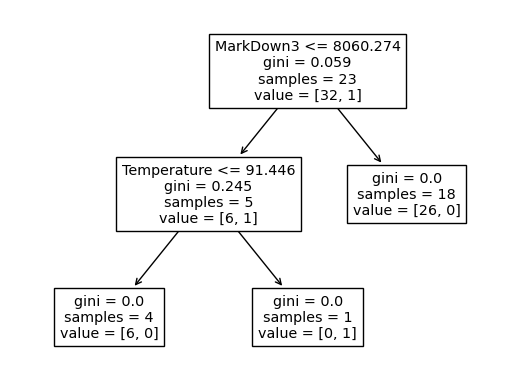

In [232]:
for arbol in bosque.estimators_:tree.plot_tree(arbol, feature_names= data_arbol.columns)
plt.show()